# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("data/advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day_of_week
df["Month"] = df["Timestamp"].dt.month

In [7]:
df.drop(columns=["City", "Country", "Ad Topic Line", "Timestamp"], inplace=True)

In [8]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Day,Month
0,68.95,35,61833.90,256.09,0,0,0,6,3
1,80.23,31,68441.85,193.77,1,0,1,0,4
2,69.47,26,59785.94,236.50,0,0,20,6,3
3,74.15,29,54806.18,245.89,1,0,2,6,1
4,68.37,35,73889.99,225.58,0,0,3,4,6
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,21,3,2
996,51.30,45,67782.17,134.42,1,1,2,4,4
997,51.63,51,42415.72,120.37,1,1,17,0,2
998,55.55,19,41920.79,187.95,0,0,2,3,3


# 1. Exploratory Data Analysis

In [9]:
print(df['Clicked on Ad'].value_counts())


Clicked on Ad
0    500
1    500
Name: count, dtype: int64


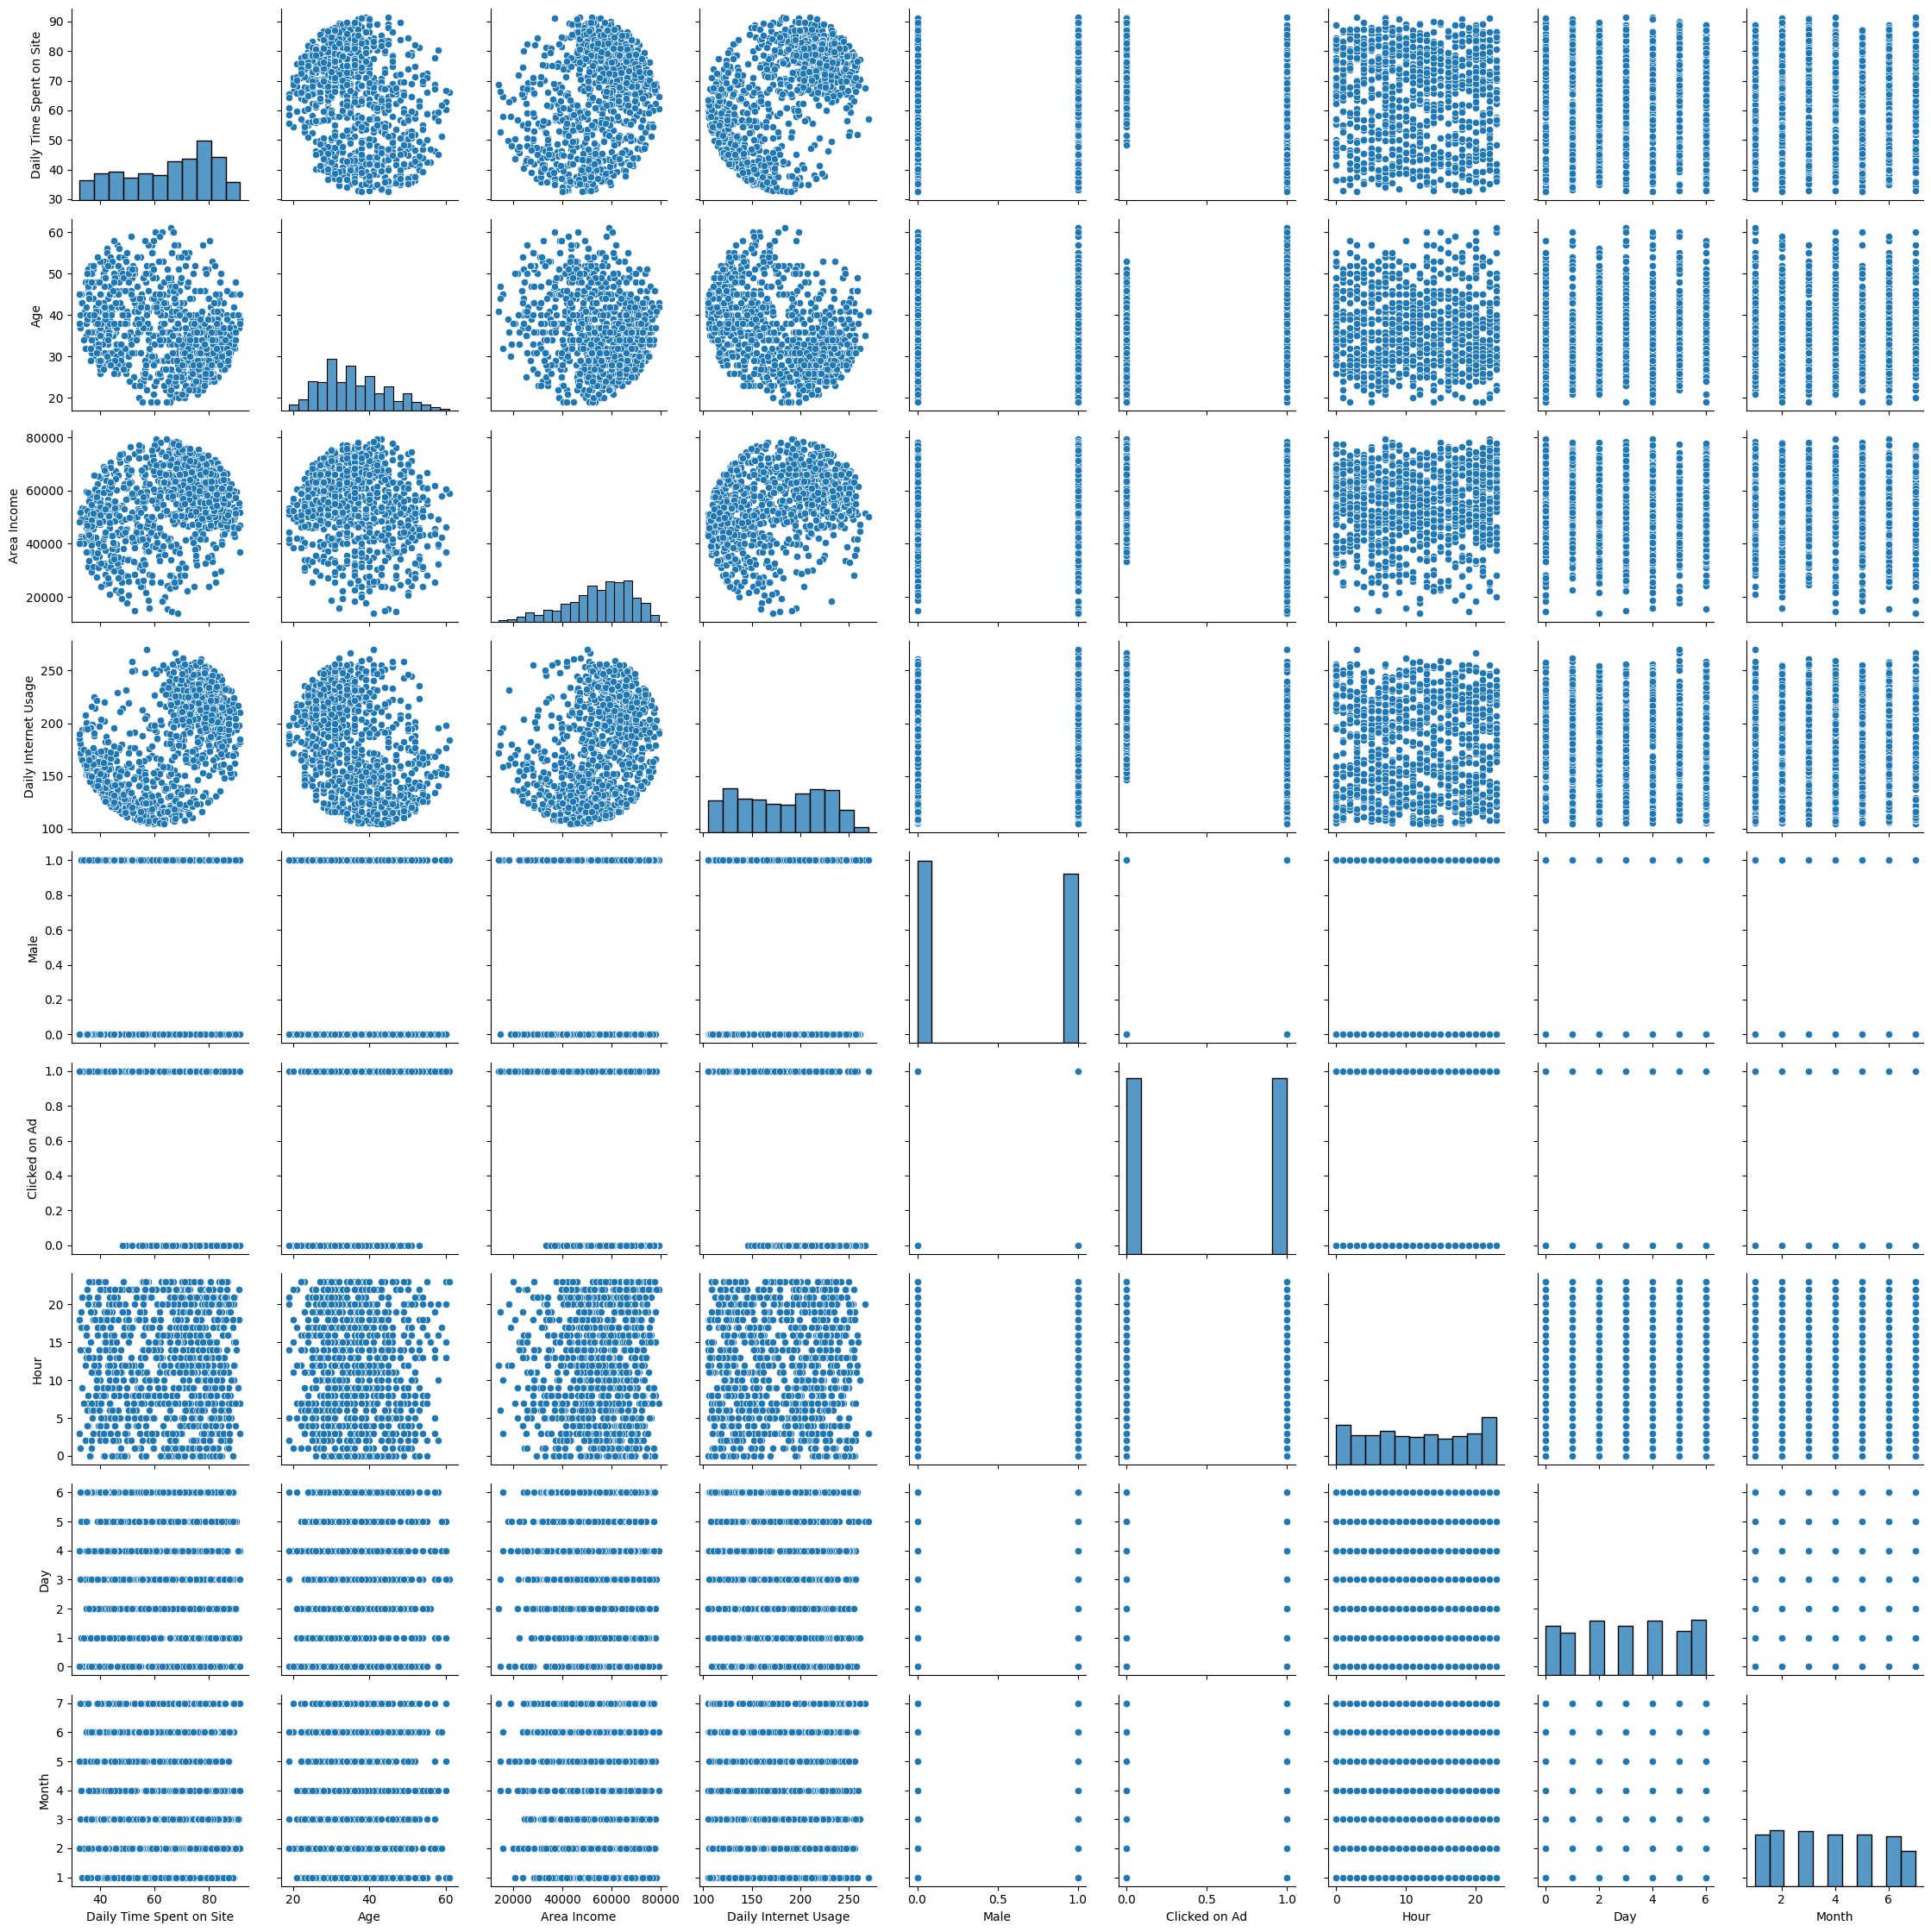

In [10]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

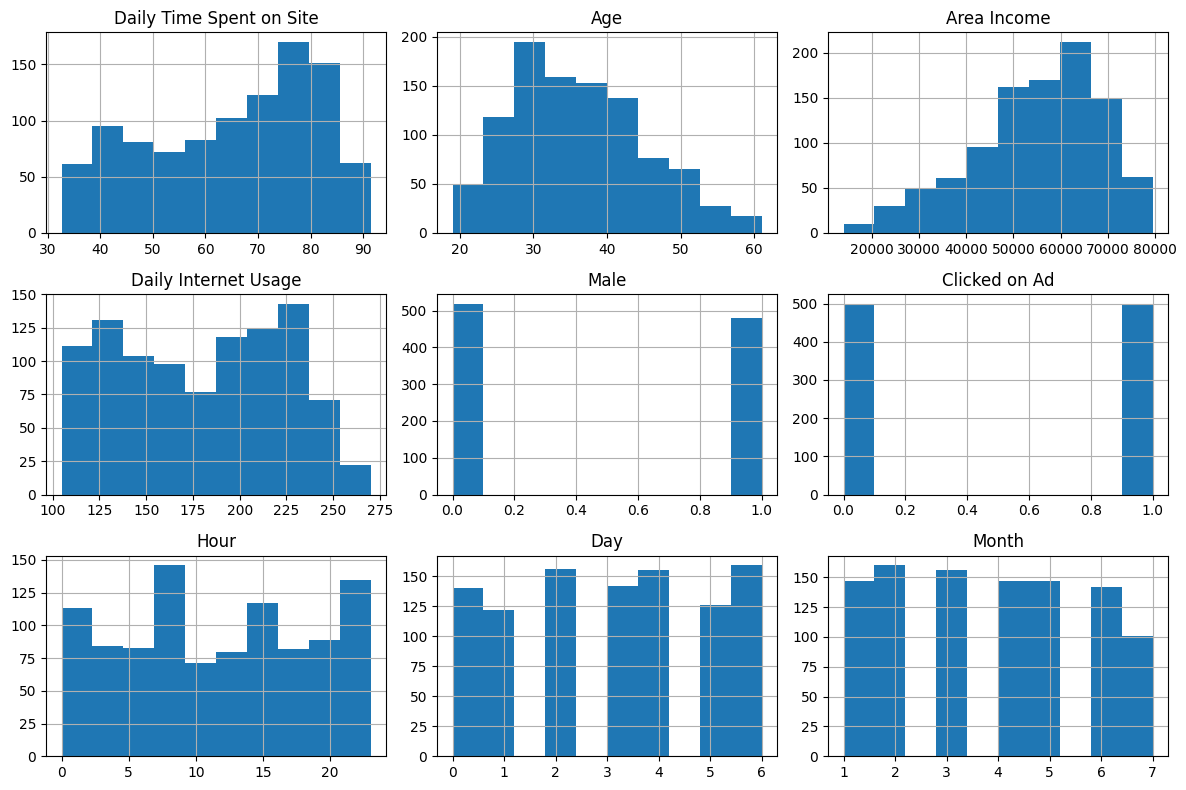

In [11]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


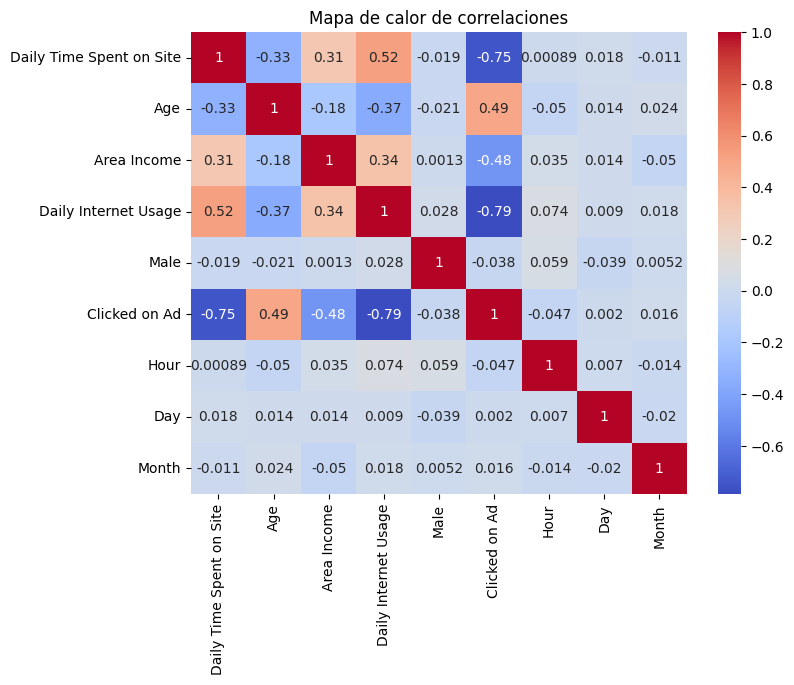

In [12]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [13]:
x = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']




#### 2. Train test split


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)


(800, 8) (200, 8)


In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)



In [16]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)


#### 3. StandardScaler()


# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [17]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("Accuracy en cada fold de la CV:", cv_scores)
print("Media de Accuracy en cross-validation:", cv_scores.mean())

Accuracy en cada fold de la CV: [0.975   0.98125 0.9625  0.94375 0.975  ]
Media de Accuracy en cross-validation: 0.9674999999999999


# 4. Evaluation


In [18]:
y_pred = model.predict(x_test)

print("Accuracy en el test set:", accuracy_score(y_test, y_pred))
print()
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print()
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy en el test set: 0.945

Matriz de confusión:
 [[ 83   6]
 [  5 106]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200




#### 1. Confusion Matrix


In [19]:
import sklearn.metrics as metrics
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 83   6]
 [  5 106]]


<Axes: >

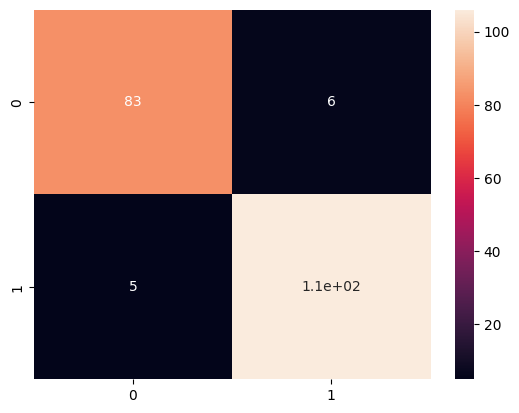

In [20]:
sns.heatmap(cm,annot=True)


#### 2. Precision


In [26]:
import sklearn.metrics as metrics
precision = metrics.precision_score(x_test, predictions)
print(precision)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets



#### 3. Recall


In [ ]:
recall = metrics.recall_score(x_test, predictions)
print(recall)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets



#### 4. F1 Score


In [23]:
f1 = metrics.f1_score(x_test, predictions)
print(f1 * 100, "%")

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets



#### 5. ROC curve



#### 6. P-R curve